In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing

from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Loading data

In [106]:
data1 = pd.read_csv('a1_raw.csv')
data2 = pd.read_csv('a2_raw.csv')
data3 = pd.read_csv('a3_raw.csv')
data4 = pd.read_csv('b1_raw.csv')
data5 = pd.read_csv('b3_raw.csv')
data6 = pd.read_csv('c1_raw.csv')
data7 = pd.read_csv('c3_raw.csv')

data = pd.concat([data1, data2, data3, data4, data5, data6, data7])
data.head()

,lhx,lhy,lhz,rhx,rhy,rhz,hx,hy,hz,sx,sy,sz,lwx,lwy,lwz,rwx,rwy,rwz,timestamp,phase
0,5.347435,4.363681,1.501913,5.258967,4.319263,1.488703,5.037871,1.618295,1.778350,5.062803,4.229656,1.772577,4.972902,4.301065,1.564781,5.553945,4.370456,1.553521,5702026,Rest
1,4.869622,4.254210,1.556133,5.240113,4.346338,1.554309,5.037610,1.618370,1.778573,5.061430,4.228504,1.772859,4.974908,4.303656,1.565527,5.423875,4.303708,1.569942,5702058,Rest
2,5.357447,4.364039,1.500969,5.238928,4.347924,1.554150,5.037514,1.618298,1.778774,5.059245,4.228004,1.773568,4.981612,4.305363,1.563643,5.332170,4.438061,1.572841,5702089,Rest
3,4.942886,4.281878,1.546513,5.111436,4.229660,1.527091,5.037526,1.618612,1.778855,5.056475,4.226891,1.774519,4.987158,4.304063,1.565929,5.311104,4.396774,1.566368,5702120,Rest
4,5.003160,4.278530,1.542866,4.985812,4.182155,1.520330,5.037557,1.619226,1.778925,5.052367,4.225485,1.775536,4.983912,4.296833,1.569889,5.193762,4.335417,1.560144,5702167,Rest


# Processing data

In [102]:
le = preprocessing.LabelEncoder()
X = np.array(data.drop(['timestamp','phase'],axis=1).values)
y = np.array(le.fit_transform(data['phase']))
print(X.shape, y.shape)
X_train_80,X_test_20,y_train_80,y_test_20 = train_test_split(X,y,test_size=0.2, random_state = 42)
print(X_train_80.shape, X_test_20.shape, y_train_80.shape, y_test_20.shape)

X_train_50,X_test_50,y_train_50,y_test_50 = train_test_split(X,y,test_size=0.5, random_state = 42)
print(X_train_50.shape, X_test_50.shape, y_train_50.shape, y_test_50.shape)

X_train_20,X_test_80,y_train_20,y_test_80 = train_test_split(X,y,test_size=0.8, random_state = 42)
print(X_train_20.shape, X_test_80.shape, y_train_20.shape, y_test_80.shape)


(9901, 18) (9901,)
(7920, 18) (1981, 18) (7920,) (1981,)
(4950, 18) (4951, 18) (4950,) (4951,)
(1980, 18) (7921, 18) (1980,) (7921,)


In [3]:
def draw_heatmap(score, lists, acc_desc, hyper_p):
    fig, ax = plt.subplots(figsize=(2,4))
    ax = sns.heatmap(score, annot=True, fmt='.3f', yticklabels=lists, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    plt.title(acc_desc)
    ax.set(xlabel=hyper_p)


# Support Vector Machine

## (i) Using 80% training data, 20% testing data

### 1. Training model

In [49]:
# parameter C's
C_list = [10**(4),10**(2), 1, 10**(-2), 10**(-4)];
svc = LinearSVC(random_state=0)
grid = GridSearchCV(svc, [{'C':C_list}], cv=3, scoring='accuracy', return_train_score = True)
grid.fit(X_train_80, y_train_80)

GridSearchCV(cv=3, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [10000, 100, 1, 0.01, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'C': 1} with accuracy 0.568


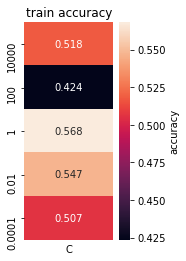

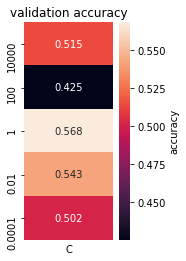

In [50]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_svm_1 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_svm_1 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_svm_1, C_list, 'train accuracy', 'C')
draw_heatmap(val_acc_svm_1, C_list, 'validation accuracy', 'C')

### 3. Test model accuracy

In [51]:
y_hat_svm_1 = grid.predict(X_test_20)
print('test accuracy is %.3f' %accuracy_score(y_test_20, y_hat_svm_1))

test accuracy is 0.574


## (ii) Using 50% training data, 50% testing data

### 1. Training model

In [52]:
grid.fit(X_train_50, y_train_50)

GridSearchCV(cv=3, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [10000, 100, 1, 0.01, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'C': 1} with accuracy 0.565


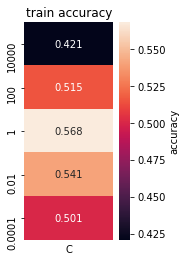

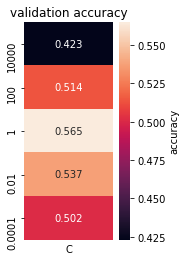

In [53]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_svm_2 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_svm_2 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_svm_2, C_list, 'train accuracy', 'C')
draw_heatmap(val_acc_svm_2, C_list, 'validation accuracy', 'C')

### 3. Test model accuracy

In [54]:
y_hat_svm_2 = grid.predict(X_test_50)
print('test accuracy is %0.3f' %accuracy_score(y_test_50, y_hat_svm_2))

test accuracy is 0.558


## (iii) Using 20% training data, 80% testing data

### 1. Training model

In [55]:
grid.fit(X_train_20, y_train_20)

GridSearchCV(cv=3, error_score='raise',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [10000, 100, 1, 0.01, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'C': 1} with accuracy 0.546


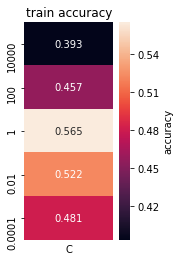

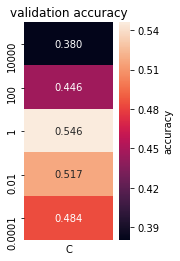

In [56]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_svm_3 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_svm_3 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_svm_3, C_list, 'train accuracy', 'C')
draw_heatmap(val_acc_svm_3, C_list, 'validation accuracy', 'C')

### 3. Test model accuracy

In [57]:
y_hat_svm_3 = grid.predict(X_test_80)
print('test accuracy is %0.3f' %accuracy_score(y_test_80, y_hat_svm_3))

test accuracy is 0.548


# K-nearest Neighbors 

## (i) Using 80% training data, 20% testing data

### 1. Training model

In [13]:
n_neighbors_list = [1,2,3,4,5]
knn = KNeighborsClassifier(algorithm = 'kd_tree')
grid = GridSearchCV(knn, [{'n_neighbors':n_neighbors_list}], cv=3, scoring='accuracy', return_train_score = True)
grid.fit(X_train_80, y_train_80)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'n_neighbors': 1} with accuracy 0.888


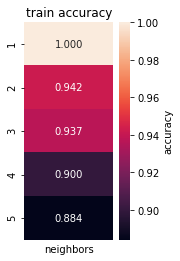

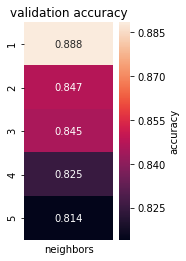

In [14]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_knn_1 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_knn_1 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_knn_1, n_neighbors_list, 'train accuracy', 'neighbors')
draw_heatmap(val_acc_knn_1, n_neighbors_list, 'validation accuracy', 'neighbors')

### 3. Test model accuracy

In [15]:
y_hat_knn_1 = grid.predict(X_test_20)
print('test accuracy is %0.3f' %accuracy_score(y_test_20, y_hat_knn_1))

test accuracy is 0.912


## (ii) Using 50% training data, 50% testing data

### 1. Training model

In [16]:
grid.fit(X_train_50, y_train_50)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'n_neighbors': 1} with accuracy 0.849


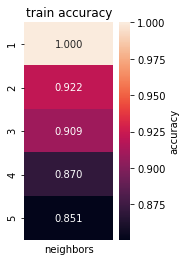

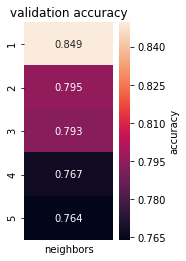

In [17]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_knn_2 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_knn_2 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_knn_2, n_neighbors_list, 'train accuracy', 'neighbors')
draw_heatmap(val_acc_knn_2, n_neighbors_list, 'validation accuracy', 'neighbors')

### 3. Test model accuracy

In [18]:
y_hat_knn_2 = grid.predict(X_test_50)
print('test accuracy is %0.3f' %accuracy_score(y_test_50, y_hat_knn_2))

test accuracy is 0.887


## (iii) Using 20% training data, 80% testing data

### 1. Training model

In [19]:
grid.fit(X_train_20, y_train_20)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'n_neighbors': 1} with accuracy 0.771


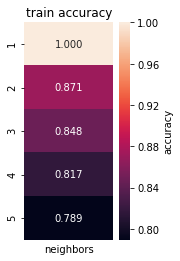

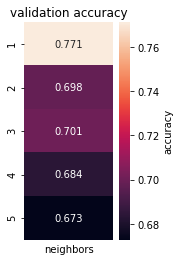

In [20]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_knn_3 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_knn_3 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_knn_3, n_neighbors_list, 'train accuracy', 'neighbors')
draw_heatmap(val_acc_knn_3, n_neighbors_list, 'validation accuracy', 'neighbors')

### 3. Test model accuracy

In [21]:
y_hat_knn_3 = grid.predict(X_test_80)
print('test accuracy is %0.3f' %accuracy_score(y_test_80, y_hat_knn_3))

test accuracy is 0.805


# Decision Tree

## (i) Using 80% training data, 20% testing data

### 1. Training model

In [22]:
max_depth_list = [1,10,20,30,40]
dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, [{'max_depth':max_depth_list}], cv=3, scoring='accuracy', return_train_score = True)
grid.fit(X_train_80, y_train_80)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 10, 20, 30, 40]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'max_depth': 40} with accuracy 0.855


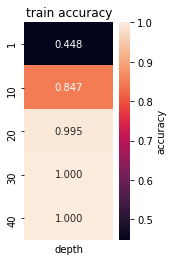

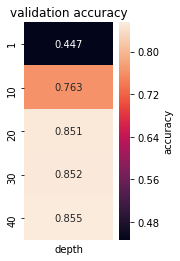

In [23]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_dt_1 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_dt_1 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_dt_1, max_depth_list, 'train accuracy', 'depth')
draw_heatmap(val_acc_dt_1, max_depth_list, 'validation accuracy', 'depth')

### 3. Test model accuracy

In [24]:
y_hat_dt_1 = grid.predict(X_test_20)
print('test accuracy is %0.3f' %accuracy_score(y_test_20, y_hat_dt_1))

test accuracy is 0.871


## (ii) Using 50% training data, 50% testing data

### 1. Training model

In [25]:
grid.fit(X_train_50, y_train_50)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 10, 20, 30, 40]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'max_depth': 30} with accuracy 0.810


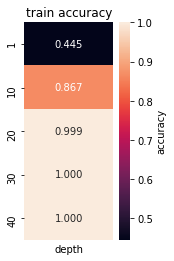

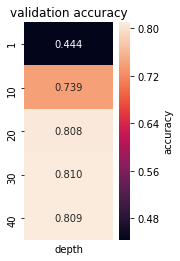

In [26]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_dt_2 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_dt_2 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_dt_2, max_depth_list, 'train accuracy', 'depth')
draw_heatmap(val_acc_dt_2, max_depth_list, 'validation accuracy', 'depth')

### 3. Test model accuracy

In [27]:
y_hat_dt_2 = grid.predict(X_test_50)
print('test accuracy is %0.3f' %accuracy_score(y_test_50, y_hat_dt_2))

test accuracy is 0.852


## (iii) Using 20% training data, 80% testing data

### 1. Training model

In [28]:
grid.fit(X_train_20, y_train_20)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 10, 20, 30, 40]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'max_depth': 30} with accuracy 0.708


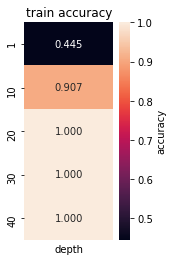

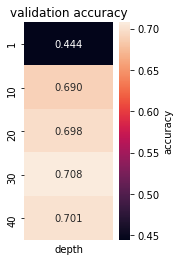

In [29]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_dt_3 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_dt_3 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_dt_3, max_depth_list, 'train accuracy', 'depth')
draw_heatmap(val_acc_dt_3, max_depth_list, 'validation accuracy', 'depth')

### 3. Test model accuracy

In [30]:
y_hat_dt_3 = grid.predict(X_test_80)
print('test accuracy is %0.3f' %accuracy_score(y_test_80, y_hat_dt_3))

test accuracy is 0.751


# Random Forest

## (i) Using 80% training data, 20% testing data

### 1. Training model

In [31]:
rf = RandomForestClassifier(n_estimators=100)
max_depth_list = [1,10,20,30,40]
grid = GridSearchCV(rf, [{'max_depth':max_depth_list}], cv=3, scoring='accuracy', return_train_score = True)
grid.fit(X_train_80, y_train_80)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 10, 20, 30, 40]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'max_depth': 30} with accuracy 0.918


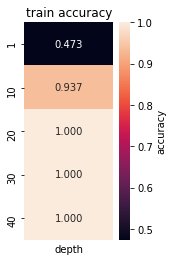

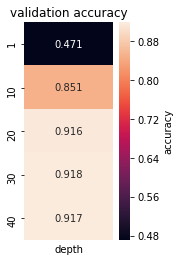

In [32]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_rf_1 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_rf_1 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_rf_1, max_depth_list, 'train accuracy', 'depth')
draw_heatmap(val_acc_rf_1, max_depth_list, 'validation accuracy', 'depth')

### 3. Test model accuracy

In [33]:
y_hat_rf_1 = grid.predict(X_test_20)
print('test accuracy is %0.3f' %accuracy_score(y_test_20, y_hat_rf_1))

test accuracy is 0.939


## (ii) Using 50% training data, 50% testing data

### 1. Training model

In [34]:
grid.fit(X_train_50, y_train_50)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 10, 20, 30, 40]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'max_depth': 30} with accuracy 0.885


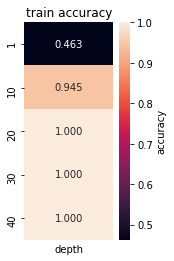

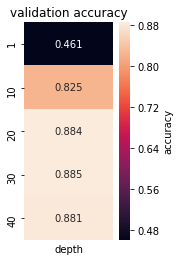

In [35]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_rf_2 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_rf_2 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_rf_2, max_depth_list, 'train accuracy', 'depth')
draw_heatmap(val_acc_rf_2, max_depth_list, 'validation accuracy', 'depth')

### 3. Test model accuracy

In [36]:
y_hat_rf_2 = grid.predict(X_test_50)
print('test accuracy is %0.3f' %accuracy_score(y_test_50, y_hat_rf_2))

test accuracy is 0.914


## (iii) Using 20% training data, 80% testing data

### 1. Training model

In [37]:
grid.fit(X_train_20, y_train_20)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'max_depth': [1, 10, 20, 30, 40]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'max_depth': 30} with accuracy 0.807


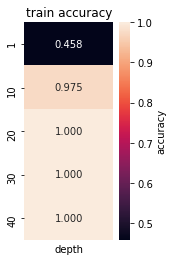

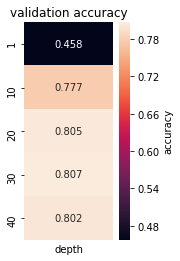

In [38]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_rf_3 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_rf_3 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_rf_3, max_depth_list, 'train accuracy', 'depth')
draw_heatmap(val_acc_rf_3, max_depth_list, 'validation accuracy', 'depth')

### 3. Test model accuracy

In [39]:
y_hat_rf_3 = grid.predict(X_test_80)
print('test accuracy is %0.3f' %accuracy_score(y_test_80, y_hat_rf_3))

test accuracy is 0.839


# Logistic Regression

## (i) Using 80% training data, 20% testing data

### 1. Training model

In [88]:
lr = LogisticRegression()
C_list = [10**(4),10**(2), 1, 10**(-2), 10**(-4)];
grid = GridSearchCV(lr, [{'C':C_list}], cv=3, scoring='accuracy', return_train_score = True)
grid.fit(X_train_80, y_train_80)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [10000, 100, 1, 0.01, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'C': 10000} with accuracy 0.570


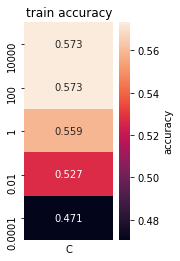

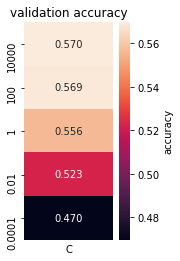

In [89]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_lr_1 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_lr_1 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_lr_1, C_list, 'train accuracy', 'C')
draw_heatmap(val_acc_lr_1, C_list, 'validation accuracy', 'C')

### 3. Test model accuracy

In [90]:
y_hat_lr_1 = grid.predict(X_test_20)
print('test accuracy is %0.3f' %accuracy_score(y_test_20, y_hat_lr_1))

test accuracy is 0.571


## (ii) Using 50% training data, 50% testing data

### 1. Training model

In [103]:
grid.fit(X_train_50, y_train_50)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [10000, 100, 1, 0.01, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'C': 100} with accuracy 0.565


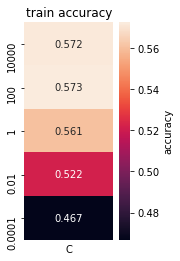

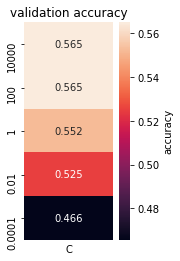

In [104]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_lr_2 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_lr_2 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_lr_2, C_list, 'train accuracy', 'C')
draw_heatmap(val_acc_lr_2, C_list, 'validation accuracy', 'C')

### 3. Test model accuracy

In [105]:
y_hat_lr_2 = grid.predict(X_test_50)
print('test accuracy is %0.3f' %accuracy_score(y_test_50, y_hat_lr_2))

test accuracy is 0.571


## (iii) Using 20% training data, 80% testing data

### 1. Training model

In [99]:
grid.fit(X_train_20, y_train_20)

GridSearchCV(cv=3, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'C': [10000, 100, 1, 0.01, 0.0001]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### 2. print train and validation accuracy

Best parameters are {'C': 100} with accuracy 0.582


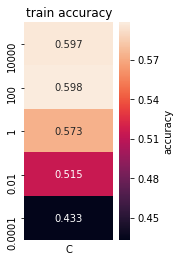

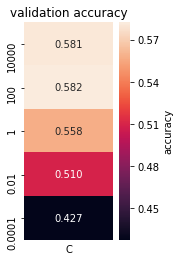

In [100]:
print('Best parameters are',grid.best_params_, 
      'with accuracy %0.3f'%np.max(grid.cv_results_['mean_test_score']))
train_acc_lr_3 = grid.cv_results_['mean_train_score'].reshape(5,1)
val_acc_lr_3 = grid.cv_results_['mean_test_score'].reshape(5,1)
draw_heatmap(train_acc_lr_3, C_list, 'train accuracy', 'C')
draw_heatmap(val_acc_lr_3, C_list, 'validation accuracy', 'C')

### 3. Test model accuracy

In [101]:
y_hat_lr_3 = grid.predict(X_test_80)
print('test accuracy is %0.3f' %accuracy_score(y_test_80, y_hat_lr_3))

test accuracy is 0.569
